In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


number of people: 64.99999785095541
(1080, 1920)


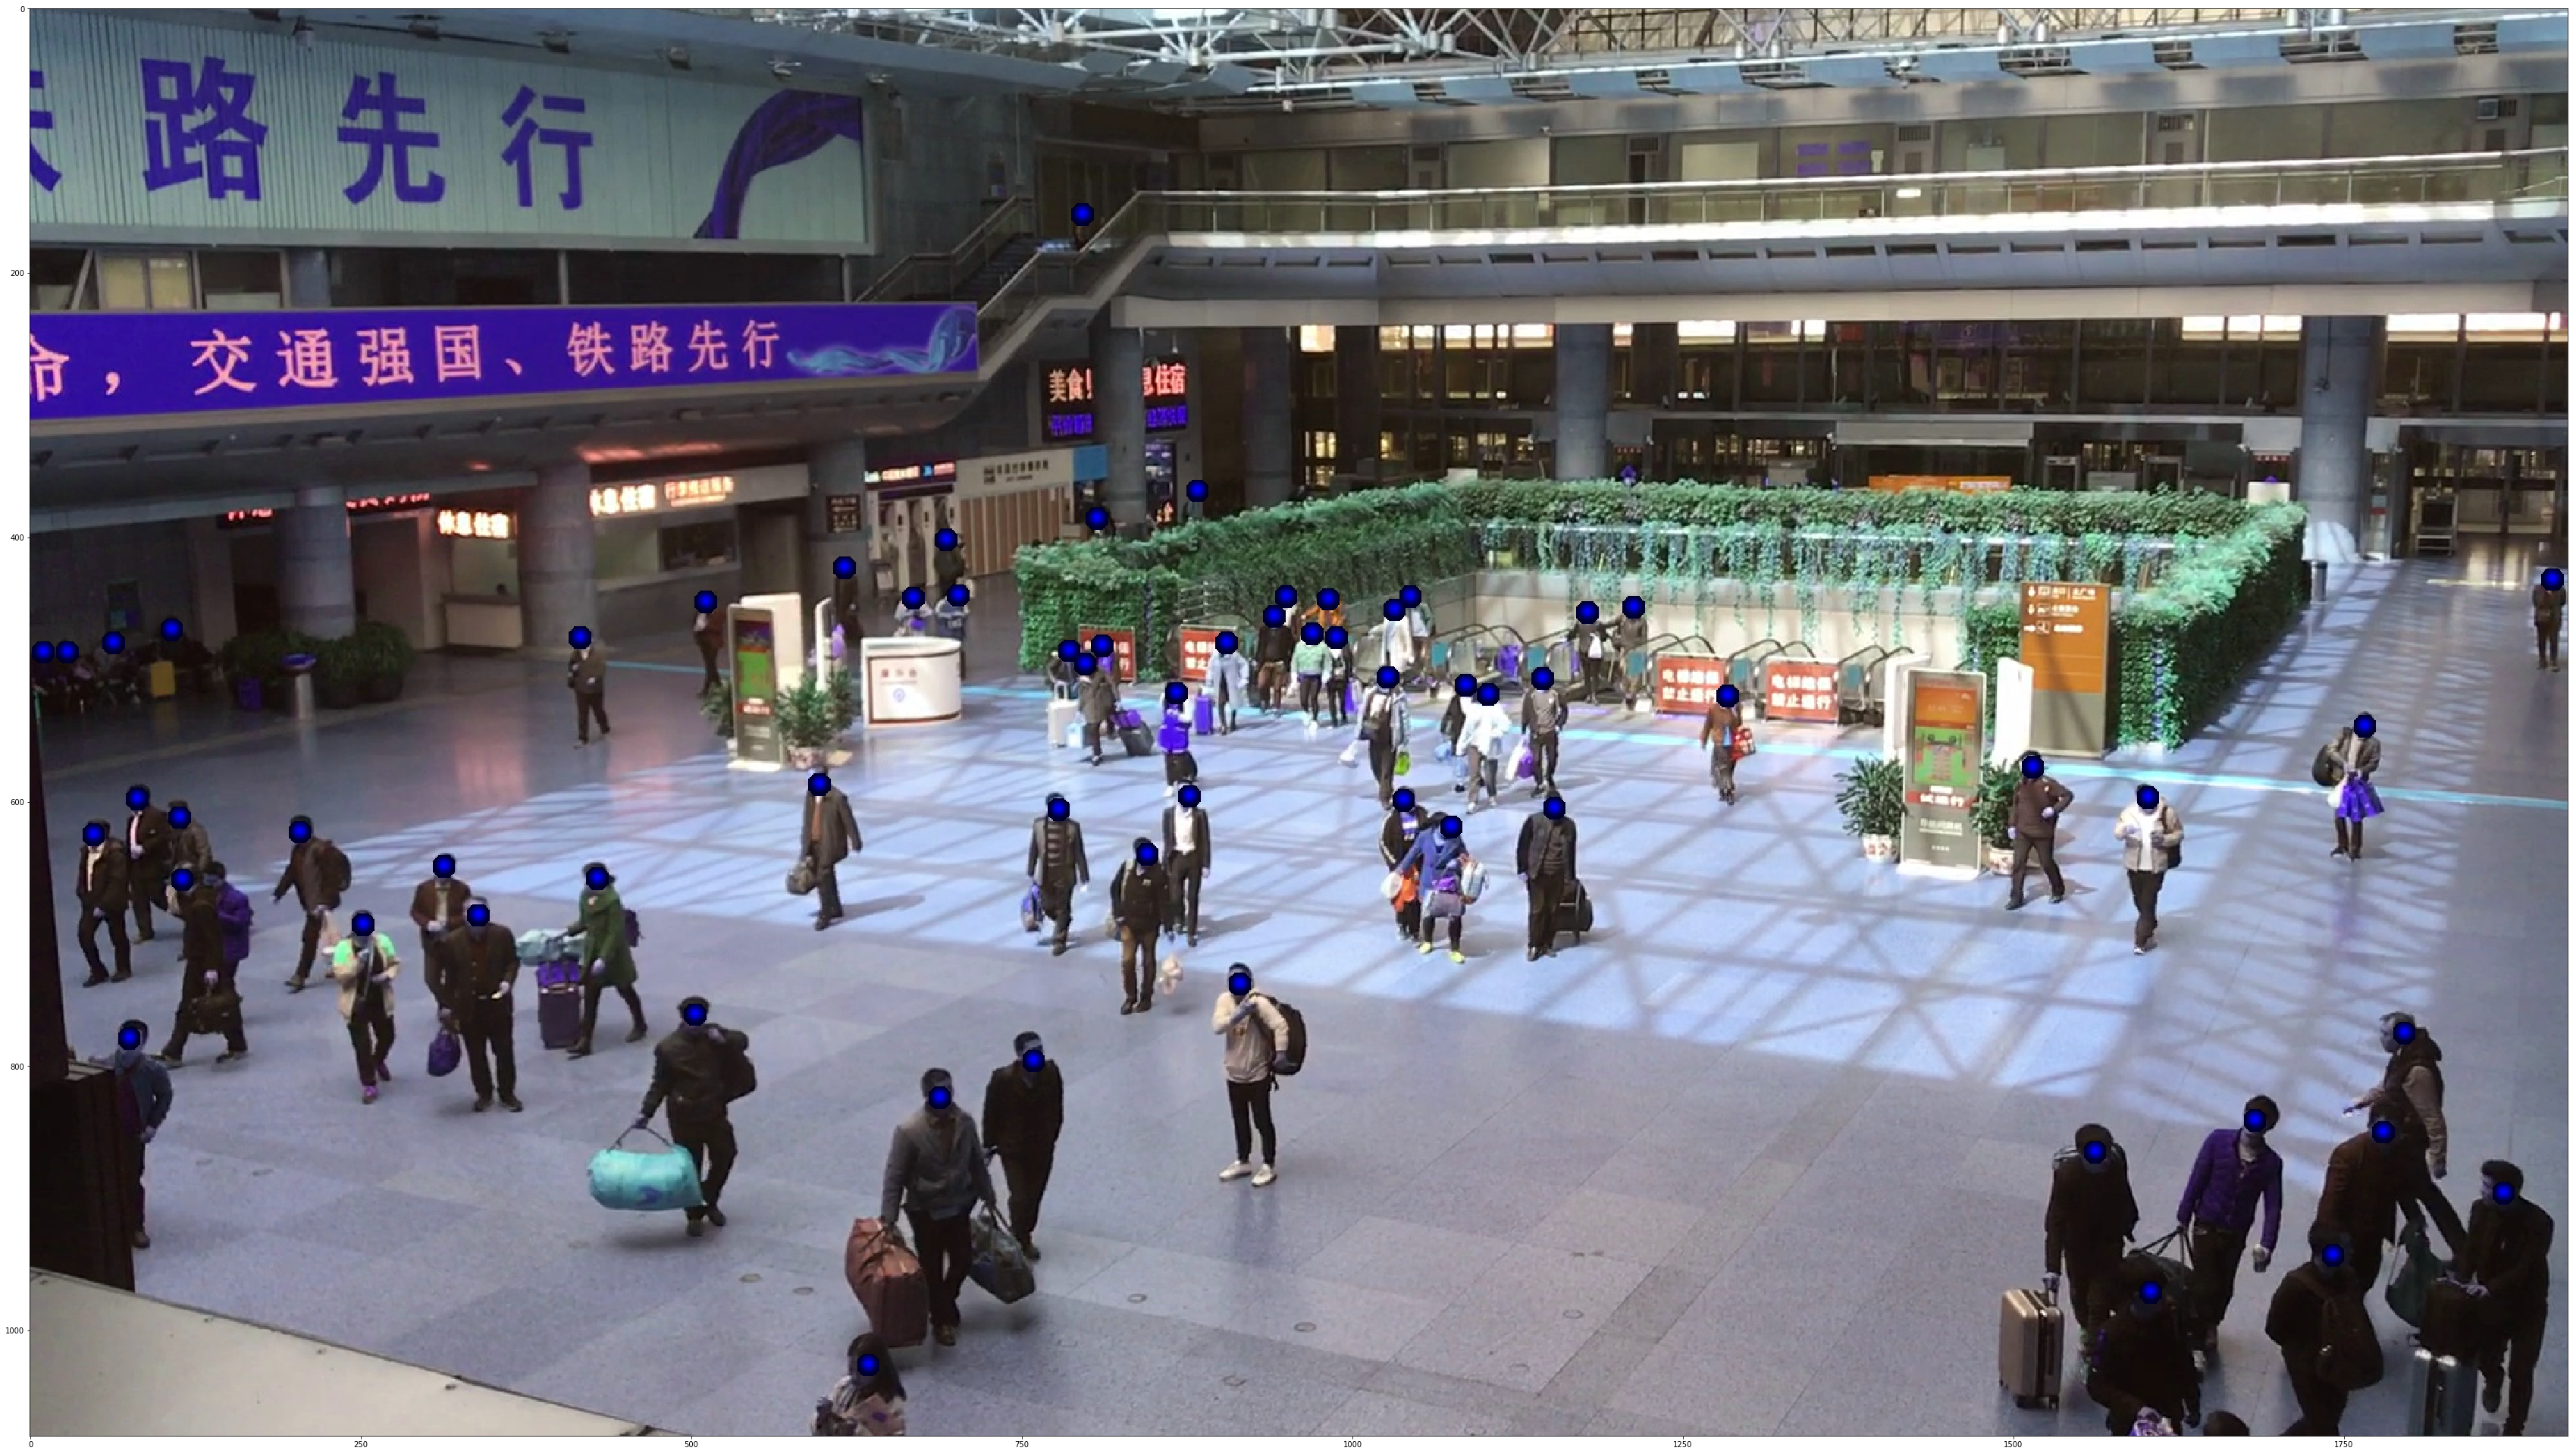

In [4]:
img = cv2.imread('./data/Images/out9000.jpg')
dens_map = pd.read_csv('./data/ground_truth/out9000.csv', sep=',', header=None).as_matrix()
count = np.sum(dens_map)
print('number of people: ' + str(count))

print(dens_map.shape)
dens_map = cv2.resize(dens_map, (img.shape[1], img.shape[0]))
dens_map = 255*dens_map/np.max(dens_map)
dens_map = dens_map.astype(np.uint8, copy=False)

for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        if dens_map[i, j] > 30:
            cv2.circle(img, (j, i), 1, (0, 0, int(dens_map[i, j])))

plt.figure(figsize=(60,60))
plt.imshow(img)
plt.show()